# CS170A -- HW#2: Eigenfaces -- Python

Your name:  ______________________

Your UID:  _________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

## Problem 1:  Eigenfaces

Chapter 11 of the Course Reader is on Eigenfaces.
For this assignment we have included the face files
for this chapter in the directory <tt>old_faces</tt>.
It includes some Matlab scripts and a database of 177 face images,
each a grayscale <tt>.bmp</tt> bitmap file of size $64 \times 64$ pixels.
The face images have been pre-processed so that the background
and hair are removed and the faces have similar lighting conditions.

The Course Reader explains how to
reshape each face image into a $1 \times 64^2 \, = \, 1 \times 4096$ row vector, and collect them into a matrix.
The principal components of the matrix then define the main dimensions of variance in the faces.
The program <tt>more_efficient_eigenfaces.m</tt> shows how to do this.
These principal components are called <i>eigenfaces</i>.

### This Assignment uses a new Face Dataset -- with Normal and Smiling Faces

The goal of this problem is to apply the same ideas to a new set of 200 faces in the directory <tt>new_faces</tt>.
The subdirectory <tt>new_faces/faces</tt> has 200 faces that have been normalized, cropped, and equalized.
The subdirectory <tt>new_faces/smiling_faces</tt> has 200 images of the same people, but they are smiling.
Each of these images is a grayscale <tt>.jpg</tt> file with size $193 \times 162$.

### 1a:  The Average Face

Modify the program <tt>more_efficient_eigenfaces.m</tt> (available in this directory)
to use the <tt>new_faces</tt> images instead of the <tt>old_faces</tt> images.
Also, modify it to use the Matlab function <tt>imresize</tt> to downsample
each of the new faces by a factor of 3, so it is $64 \times 54$ (instead of $193 \times 162$).
Then: <i>pad</i> both sides of the image with <tt>zeros(64,5)</tt>
so the result is a $64 \times 64$ image.

Then: create a function that
takes as input a string array of filenames of face images, an integer $k$,
and an integer sample size $s$ ---
and yields the average face and the first $k$ singular values and eigenfaces as output values
for a sample of size $s$.

Apply your function to
both the <tt>new_faces/faces</tt>
and the <tt>new_faces/smiling_faces</tt>
directories,
and plot the absolute value of the difference between your average face and (your downsampled version of)
the average face provided in the directory.

(The <tt>imagesc</tt> function can display images with automatic rescaling of numeric values.)

In [1]:
#  image showing the difference between your average normal face and the one provided
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy 
import glob
from scipy.misc import imresize
Face = plt.imread('new_faces/faces/1a.jpg')

dim = imresize(Face,1/3)
plt.figure
plt.subplot(1,2,1)
plt.imshow(dim,cmap='Greys_r')
plt.show()
dim.shape

ValueError: height and width must be > 0

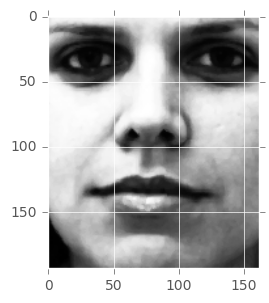

In [26]:
filenames = glob.glob("new_faces/faces/*.jpg");
filenames.remove('new_faces/faces\\averagefaceimage_seta.jpg')

sfilenames = glob.glob("new_faces/smiling_faces/*.jpg");
sfilenames.remove('new_faces/smiling_faces\\averagefaceimage_setb.jpg')

numfiles = len(filenames)
snumfiles = len(sfilenames)

rp=np.random.permutation(numfiles);
rps=np.random.permutation(snumfiles);

samplesize=200;

sample = rp[0:samplesize];
ssample = rps[0:samplesize];

len(filenames)
face=plt.imread(filenames[0])
[row, col] = np.pad(imresize(face,1/3),((0,0),(5,5)),'constant',constant_values=0).shape
filenames
face=plt.imread(filenames[0])

plt.figure
plt.subplot(1,2,1)
plt.imshow(face,cmap='Greys_r')
plt.show()

#[ "/newfaces/faces/"+ s  for s in filenames]

In [27]:
def svds(A,k):
    U,sigma,VT = np.linalg.svd(A, full_matrices=True)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = np.diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

def more_efficient_pca( F, k ):
    (n,p) = F.shape;
    
    if n > p:
        print('it would be more efficient to perform PCA using some other method')
    if k > n:
        print('this method will only compute the first n components, not k')

    Fbar = np.kron( np.ones((n,1)), np.mean(F,axis=0) );

    Y = (F-Fbar) / np.sqrt(n-1);

    U_k,  S_k , V_k = svds( Y, k );   #  k cannot be larger than n or p

    PrincipalComponents = V_k;
    SingularValues = np.power(np.diag(S_k),2);
    return (PrincipalComponents, SingularValues )

In [28]:
A = np.array([[1, 0, 1,7],[-1, -2 ,0,5],[ 0, 1, -1,8]])

In [29]:
C = np.array([[0, 2, 4, 6] ,[8, 10, 12 ,14] ,[16 ,18, 20, 22]])

In [30]:
A

array([[ 1,  0,  1,  7],
       [-1, -2,  0,  5],
       [ 0,  1, -1,  8]])

In [31]:
a = np.random.randn(6, 9) + 1j*np.random.randn(6, 9)
U, S, V = svds( np.cov(a.T), 3)
U,S,V
a,b=more_efficient_pca(a,3)

In [32]:
image_vector = lambda Bitmap: np.double(np.reshape(Bitmap, np.dot(row, col)))

def svds(A,k):
    U,sigma,VT = np.linalg.svd(A, full_matrices=True)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = np.diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

def Average_Face(filestring,s,k):
    F = np.zeros((s,row*col));
    for i in range(s):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        # figure
        # imshow(Face_Matrix)
        # title(Image_File)
        F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
    fbar = sum(F,1)/s;
    #plt.figure
    #plt.imshow((np.uint8(fbar).reshape(row,col)),cmap='Greys_r')
    #plt.title('The Average Face')
    #plt.xlabel('(average of our sample)')
    #plt.show()
    for i in range(s):
        F[i,:] = F[i,:] - fbar;
    U, singular_values = more_efficient_pca( F, k );
    #U, S, V = svds( np.cov(F.T), k);
    #singular_values = np.diag(S);
    #U=(F.T).dot(U)
    return(np.uint8(fbar).reshape(row,col),singular_values,U)



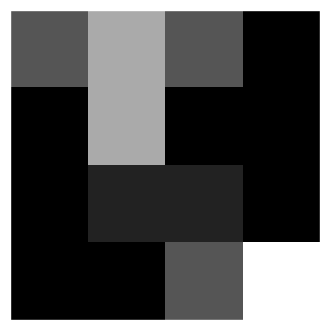

In [33]:
import matplotlib.cm as cm
import matplotlib.ticker as MT
def scaledimage(W, pixwidth=1, ax=None, grayscale=True):
    """
    Do intensity plot, similar to MATLAB imagesc()
    W = intensity matrix to visualize
    pixwidth = size of each W element
    ax = matplotlib Axes to draw on 
    grayscale = use grayscale color map
    Rely on caller to .show()
    """
    # N = rows, M = column
    (N, M) = W.shape 
    # Need to create a new Axes?
    if(ax == None):
        ax = plt.figure().gca()
    # extents = Left Right Bottom Top
    exts = (0, pixwidth * M, 0, pixwidth * N)
    if(grayscale):
        ax.imshow(W,
                  interpolation='nearest',
                  cmap=cm.gray,
                  extent=exts)
    else:
        ax.imshow(W,
                  interpolation='nearest',
                  extent=exts)

    ax.xaxis.set_major_locator(MT.NullLocator())
    ax.yaxis.set_major_locator(MT.NullLocator())
    return ax

if __name__ == '__main__':
    # Define a synthetic test dataset
    testweights = np.array([[0.25, 0.50, 0.25, 0.00],
                            [0.00, 0.50, 0.00, 0.00],
                            [0.00, 0.10, 0.10, 0.00],
                            [0.00, 0.00, 0.25, 0.75]])
    # Display it
    ax = scaledimage(testweights)
    plt.show()

In [232]:
f0,j,k=Average_Face(filenames,200,60)
k.shape


(4096, 60)

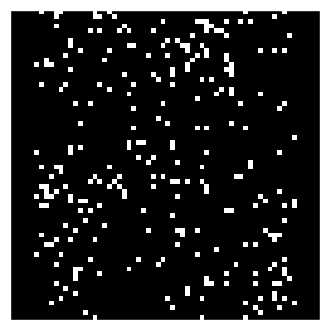

In [233]:
a=plt.imread("new_faces/faces\\averagefaceimage_seta.jpg");
b=(np.pad(imresize(a,1/3),((0,0),(5,5)),'constant',constant_values=0));

scaledimage(abs(b-f0))
plt.show()

In [234]:
f1,m,n=Average_Face(sfilenames,200,60)
n.shape

(4096, 60)

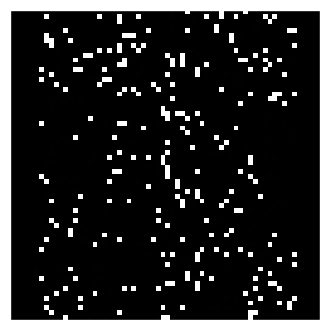

In [235]:
a=plt.imread('new_faces/smiling_faces\\averagefaceimage_setb.jpg');
b=(np.pad(imresize(a,1/3),((0,0),(5,5)),'constant',constant_values=0));
scaledimage(abs(b-f1))
plt.show()

### 1b: Smiling makes a Difference

If your mean normal face is $\overline{\mathbf{f}}_0$, and your mean smiling face is $\overline{\mathbf{f}}_1$,
render (using <tt>imagesc</tt>)
the difference $\overline{\mathbf{f}}_0-\overline{\mathbf{f}}_1$
(the average difference between normal faces and smiling faces).


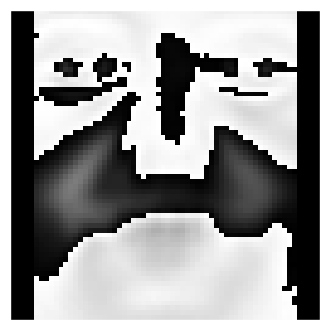

In [130]:
#  image showing the difference between the average normal face and average smiling face
scaledimage((f0-f1))
plt.show()

### 1c: Scree Plots and $k$-Approximation

Using your downsampled images,
perform PCA on each set of faces (normal and smiling).

For each image (normal or smiling), construct its $64^2 \times 1$ vector $\mathbf{f}$.
Then, subtract the average face
($\overline{\mathbf{f}}_0$ or $\overline{\mathbf{f}}_1$)
and project the remainder on the first $k = 60$ eigenfaces.
For example, with a smiling face,
the projection of $\mathbf{f}$ on the $j$-th smiling eigenface $\mathbf{e}_j$ is
$$
c_j ~=~ {(\mathbf{f} \, - \, \overline{\mathbf{f}}_1)}' \, {\mathbf{e}_j}  ~~~~~~~~~~ (j = 1,\dots,k).
$$

For each set of faces (normal or smiling),
make one large scree plot for the set, showing all sequences of the first $k$ coefficients
for each image overplotted (e.g. with <tt>hold on</tt>).

In [146]:

def scree_plot(filestring):
    i,u,w=Average_Face(filestring,200,60);
    m=image_vector(i);
    e=np.zeros(60)
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        c=image_vector(face)-m;
        e=c.dot(w)
        plt.plot(e,'.')
    plt.show()
       

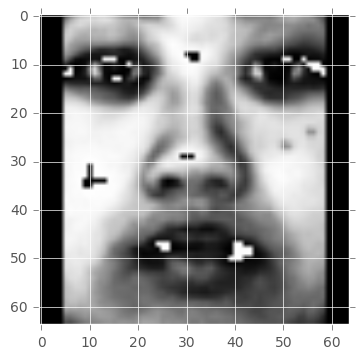

In [147]:
w=image_vector(f0);  
Face_Matrix = plt.imread('new_faces/faces\\162a.jpg');
face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
c=image_vector(face)-w;
e=c.dot(k)
r_f=m+e.dot(k.T)
r=np.uint8(r_f).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.show()

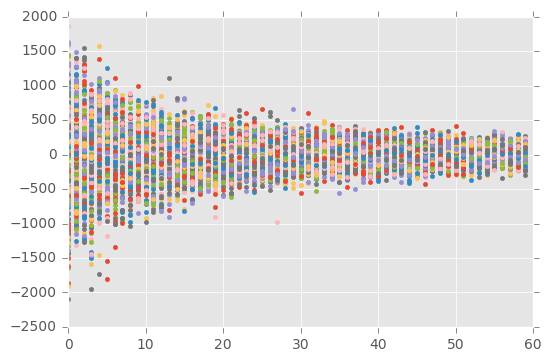

In [47]:
scree_plot(filenames)
#  (overlaid) scree plots for normal faces

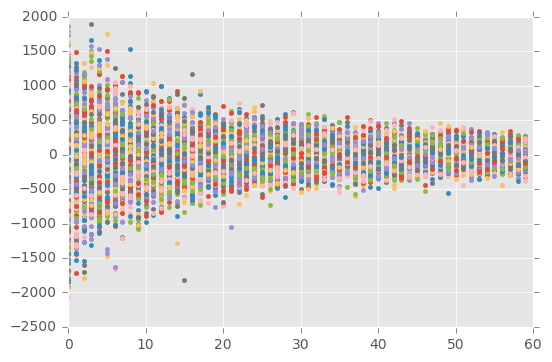

In [48]:
scree_plot(sfilenames)
#  (overlaid) scree plots for smiling faces

### 1d:  Unusualness of a Face

Let us say the <i>unusualness</i> of a face is the $L_2$ norm
of its eigenface-coefficient vector (using the first $k=60$ eigenfaces).

Determine, for each set (normal or smiling), the most unusual face.

In [173]:
def most_unusual(filestring):
    i,u,w=Average_Face(filestring,200,60);
    ave=image_vector(i);
    e=np.zeros(60)
    max=[0,0]
    for i in range(200):
            Image_File = filestring[ssample[i]];
            Face_Matrix = plt.imread(Image_File);
            face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
            c=image_vector(face)-ave;
            e=c.dot(k)
            a= np.linalg.norm(e)
            if a>max[0]:
                max[0]=a;
                max[1]=filestring[ssample[i]];
    return max;

In [175]:
#  the most unusual normal face
most_unusual(filenames)

[3443.0249658273578, 'new_faces/faces\\30a.jpg']

In [176]:
#  the most unusual smiling face
most_unusual(sfilenames)

[3672.4654394098243, 'new_faces/smiling_faces\\162b.jpg']

## Problem 2: Face Classifiers

Develop two different face classifiers using the eigenfaces you've computed;
each should be a function that, given a face image $\mathbf{f}$ as input,
yields the output value 1 if $\mathbf{f}$ is smiling, and 0 otherwise.
(NOTE: or vice-versa; we just need the function to be a classifier)

Specifically, implement the following 3 classifiers that take an input image $\mathbf{f}$:
<ul><li>  {Classifier X}:   yield 1 if the normal face unusualness of $\mathbf{f}$ is greater than smiling face unusualness of $\mathbf{f}$, else 0.
<br/><br/>
</li><li>  {Classifier Y}:   yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||^2$, else 0.
<br/><br/>
<!--
</li><li>  {Classifier Z}:   if $C_0$ is the covariance matrix for normal faces, and $C_1$ is the covariance matrix for smiling faces,
yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||_{C_0}^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||_{C_1}^2$, else 0.
<br/>
(Here: $||{\mathbf{x}}||_C^2 \;=\; {\mathbf{x}}' \; C^{-} \; \mathbf{x}$ is the kernel norm defined by the pseudo-inverse of the covariance matrix $C$.)
-->
</li></ul>

### 2a:  Unusual Face Classification

Using each of these classifiers, determine the classification it yields
for the two most unusual images you found in the previous question.

In [229]:
#  X, Y, Z classifications of the most unusual normal face
def classifier_X(f):
    #f0,j,k=Average_Face(filenames,200,200)
    #f1,m,n=Average_Face(sfilenames,200,200)
    face=np.pad(imresize(f,1/3),((0,0),(5,5)),'constant',constant_values=0);
    ave=image_vector(f0);
    save=image_vector(f1);
    c=image_vector(face)-ave;
    d=image_vector(face)-save;
    e=c.dot(k)
    g=d.dot(n)
    a= np.linalg.norm(e)
    b= np.linalg.norm(g)
    if a>b:
        return 1
    else:
        return 0
    

In [230]:
Face_Matrix = plt.imread('new_faces/faces\\30a.jpg');
classifier_X(Face_Matrix)

1

In [231]:
Face_Matrix = plt.imread('new_faces/smiling_faces\\162b.jpg');
classifier_X(Face_Matrix)

0

In [223]:
#  X, Y, Z classifications of the most unusual smiling face
def classifier_Y(f):
    face=np.pad(imresize(f,1/3),((0,0),(5,5)),'constant',constant_values=0);
    ave=image_vector(f0);
    save=image_vector(f1);
    c=image_vector(face)-ave;
    d=image_vector(face)-save;
    a= np.linalg.norm(c)**2
    b= np.linalg.norm(d)**2
    if a>=b:
        return 1
    else:
        return 0

In [224]:
Face_Matrix = plt.imread('new_faces/faces\\30a.jpg');
classifier_Y(Face_Matrix)

1

In [225]:
Face_Matrix = plt.imread('new_faces/smiling_faces\\162b.jpg');
classifier_Y(Face_Matrix)

1

### 2b:  Splitting into Training and Test sets

Write a function <tt>[Sublist1 Sublist2] = randsplit(List)</tt> that takes an array <tt>List</tt> of length <tt>n</tt>
and splits it randomly into two sublists of size <tt>floor(n/2)</tt> and <tt>ceil(n/2)</tt>.
(Hint: <tt>randperm</tt>)

Use <tt>randsplit</tt> to split each of the 200-face sets
into a <u>training subset</u> and <u>testing subset</u> of equal size.

For both sets of faces (100 normal faces and 100 smiling faces),
compute the average normal and smiling faces
$\overline{\mathbf{f}}_0$ and $\overline{\mathbf{f}}_1$
<u>for the training set</u>.

In [268]:
import math
def randsplit(l):
    n=len(l);
    perm=np.random.permutation(n);
    sub1=[];sub2=[];
    for i in range(int(math.floor(n/2))):
        sub1.append( l[perm[i]]);
    for i in range(int(math.ceil(n/2))):
        sub2.append( l[perm[i+int(np.floor(n/2))]]);
    return (sub1, sub2);
len(filenames)
np.floor(200/2)

100.0

In [290]:
# The average normal face (for the training set)
train_set,test_set=randsplit(filenames);
F = np.zeros((100,row*col));
for i in range(100):
    Image_File = train_set[i];
    Face_Matrix = plt.imread(Image_File);
    Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
    # figure
    # imshow(Face_Matrix)
    # title(Image_File)
    F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
f_0 = sum(F,1)/100;

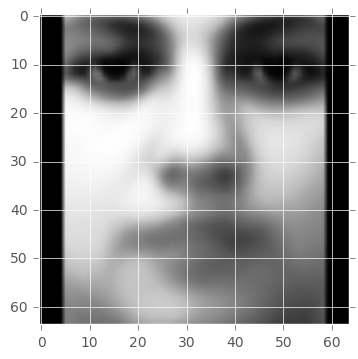

In [283]:
r=np.uint8(f_0).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.show()

In [294]:
# The average smiling face (for the training set)
strain_set,stest_set=randsplit(sfilenames);
F = np.zeros((100,row*col));
for i in range(100):
    Image_File = strain_set[i];
    Face_Matrix = plt.imread(Image_File);
    Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
    F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
f_1 = sum(F,1)/100;

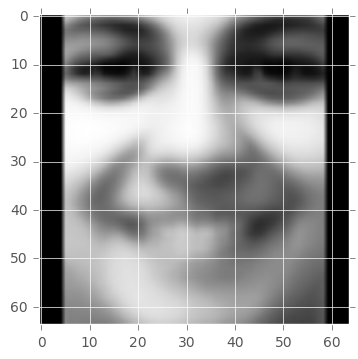

In [295]:
r=np.uint8(f_1).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.show()

### 2c:  Classifier Error Rate

For each of the Classifiers (X, Y), using the average faces you just computed: 
<ul><li>
classify each of the 200 faces $\mathbf{f}$ in the testing set, and count classification errors.
</li><li>
compute the <i>error rate</i> (percentage of errors in test face classifications) for the Classifier.
</li></ul>

Then rank the classifiers by their error rate.

#### For normal faces (using the test set):

In [30]:
# X, Y error rates

In [ ]:
#  which of the classifiers has lowest error rate for normal faces in the test set?

#### For smiling faces (using the test set):

In [32]:
# X, Y error rates

In [ ]:
#  which of the classifiers has lowest error rate for smiling faces in the test set?

## Problem 3:  Face Compression

In the previous problem you computed the first 60 Eigenface coefficients, and used these to find the most unusual face.

For each $64 \times 64$ image $X$ from your (downsampled) smiling faces, compute the following sequences:
<ul><li> (descendingly sorted absolute values of) the first 60 Eigenface coefficients for $X$
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided FFT of $X$  (in Matlab: <tt>fft2(X)</tt>)
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided DCT of $X$  (in Matlab: <tt>dct2(X)</tt>)
</li><li> the first 60 singular values from the SVD of $X$.
</li></ul>

We get an <i>image compression</i> scheme if we keep only the first $k \leq 60$ coefficients, and discard the rest.

Define
$$
\mbox{$k$-coefficient compression error} ~~=~~
\frac{\mbox{(the sum of absolute values of all coefficients after the first $k$)}}{\mbox{(the sum of absolute values of all coefficients)}} .
$$

Compute the $k$-coefficient compression error for each of the 4 transforms,
$1 \leq k \leq 60$, <u>for the smiling test set</u>.

Rank the 4 transforms above by their average compression error (for $k \leq 60$).

In [34]:
#  plot of the Eigenface's k-coefficient compression error   (for k <= 60)

In [35]:
#  plot of the two-sided FFT's k-coefficient compression error  (for k <= 60)

###   You might do something like this:
#   TwoSidedFFTofX = fft2(X);
#   SortedAbsoluteValuesOfFourierCoefficients = sort(abs(TwoSidedFFTofX(:)), 'descend');
#   figure
#   plot( SortedAbsoluteValuesOfFourierCoefficients(1:60) )

In [36]:
#  plot of the two-sided DCT's k-coefficient compression error  (for k <= 60)

In [37]:
#  plot of the rank-k singular value compression error (for k <= 60)

In [ ]:
#  which of the 4 compression schemes has lowest average compression error?